<a href="https://colab.research.google.com/github/dheeraj404/BITCOIN/blob/main/Banana_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/banana_quality.csv')

In [3]:
df

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
0     0.271290    Good  
1     0.307325    Good  
2     1.427322    Good  
3     0.477862    Good  
4     2.812442    Good  
...        ...     ...  
7995  2.398091     Bad  
7996  2.113136     Bad  
7997  0.697361     Bad  
7998  0.423569     Bad  
7999  1.435644     Bad  

[8000 rows x 8 columns]

In [4]:
numerical = []
categorical = []
for column in df.columns:
  if df[column].dtype!='O':
    numerical.append(column)
  else:
    categorical.append(column)

print(numerical)
print(categorical)

['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
['Quality']


In [5]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [6]:
unique_values = {}
for feature in categorical:
    unique_values[feature] = df[feature].unique()

df_unique_values = pd.DataFrame.from_dict([unique_values]).transpose().reset_index()

df_unique_values.columns = ['Categorical Feature','Unique_values']
df_unique_values['Number of Unique Values'] = df_unique_values['Unique_values'].apply(lambda x: len(x))

df_unique_values

Categorical Feature Unique_values  Number of Unique Values
0             Quality   [Good, Bad]                        2

In [7]:
df['Quality'] = df['Quality'].replace({'Good': 0, 'Bad': 1})

In [8]:
df

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity  Quality  
0     0.271290        0  
1     0.307325        0  
2     1.427322        0  
3     0.477862        0  
4     2.812442        0  
...        ...      ...  
7995  2.398091        1  
7996  2.113136        1  
7997  0.697361        1  
7998  0.423569        1  
7999  1.435644        1  

[8000 rows x 8 columns]

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Softness'}>,
        <Axes: title={'center': 'HarvestTime'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>, <Axes: >, <Axes: >]],
      dtype=object)

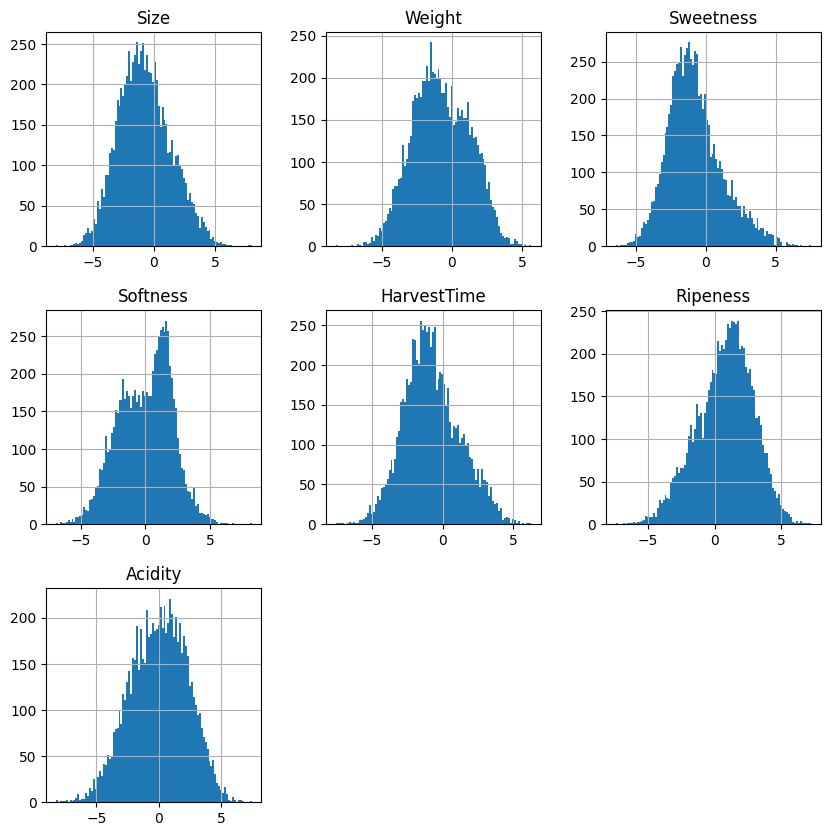

In [9]:
df[numerical[:]].hist(figsize=(10,10),bins=100)

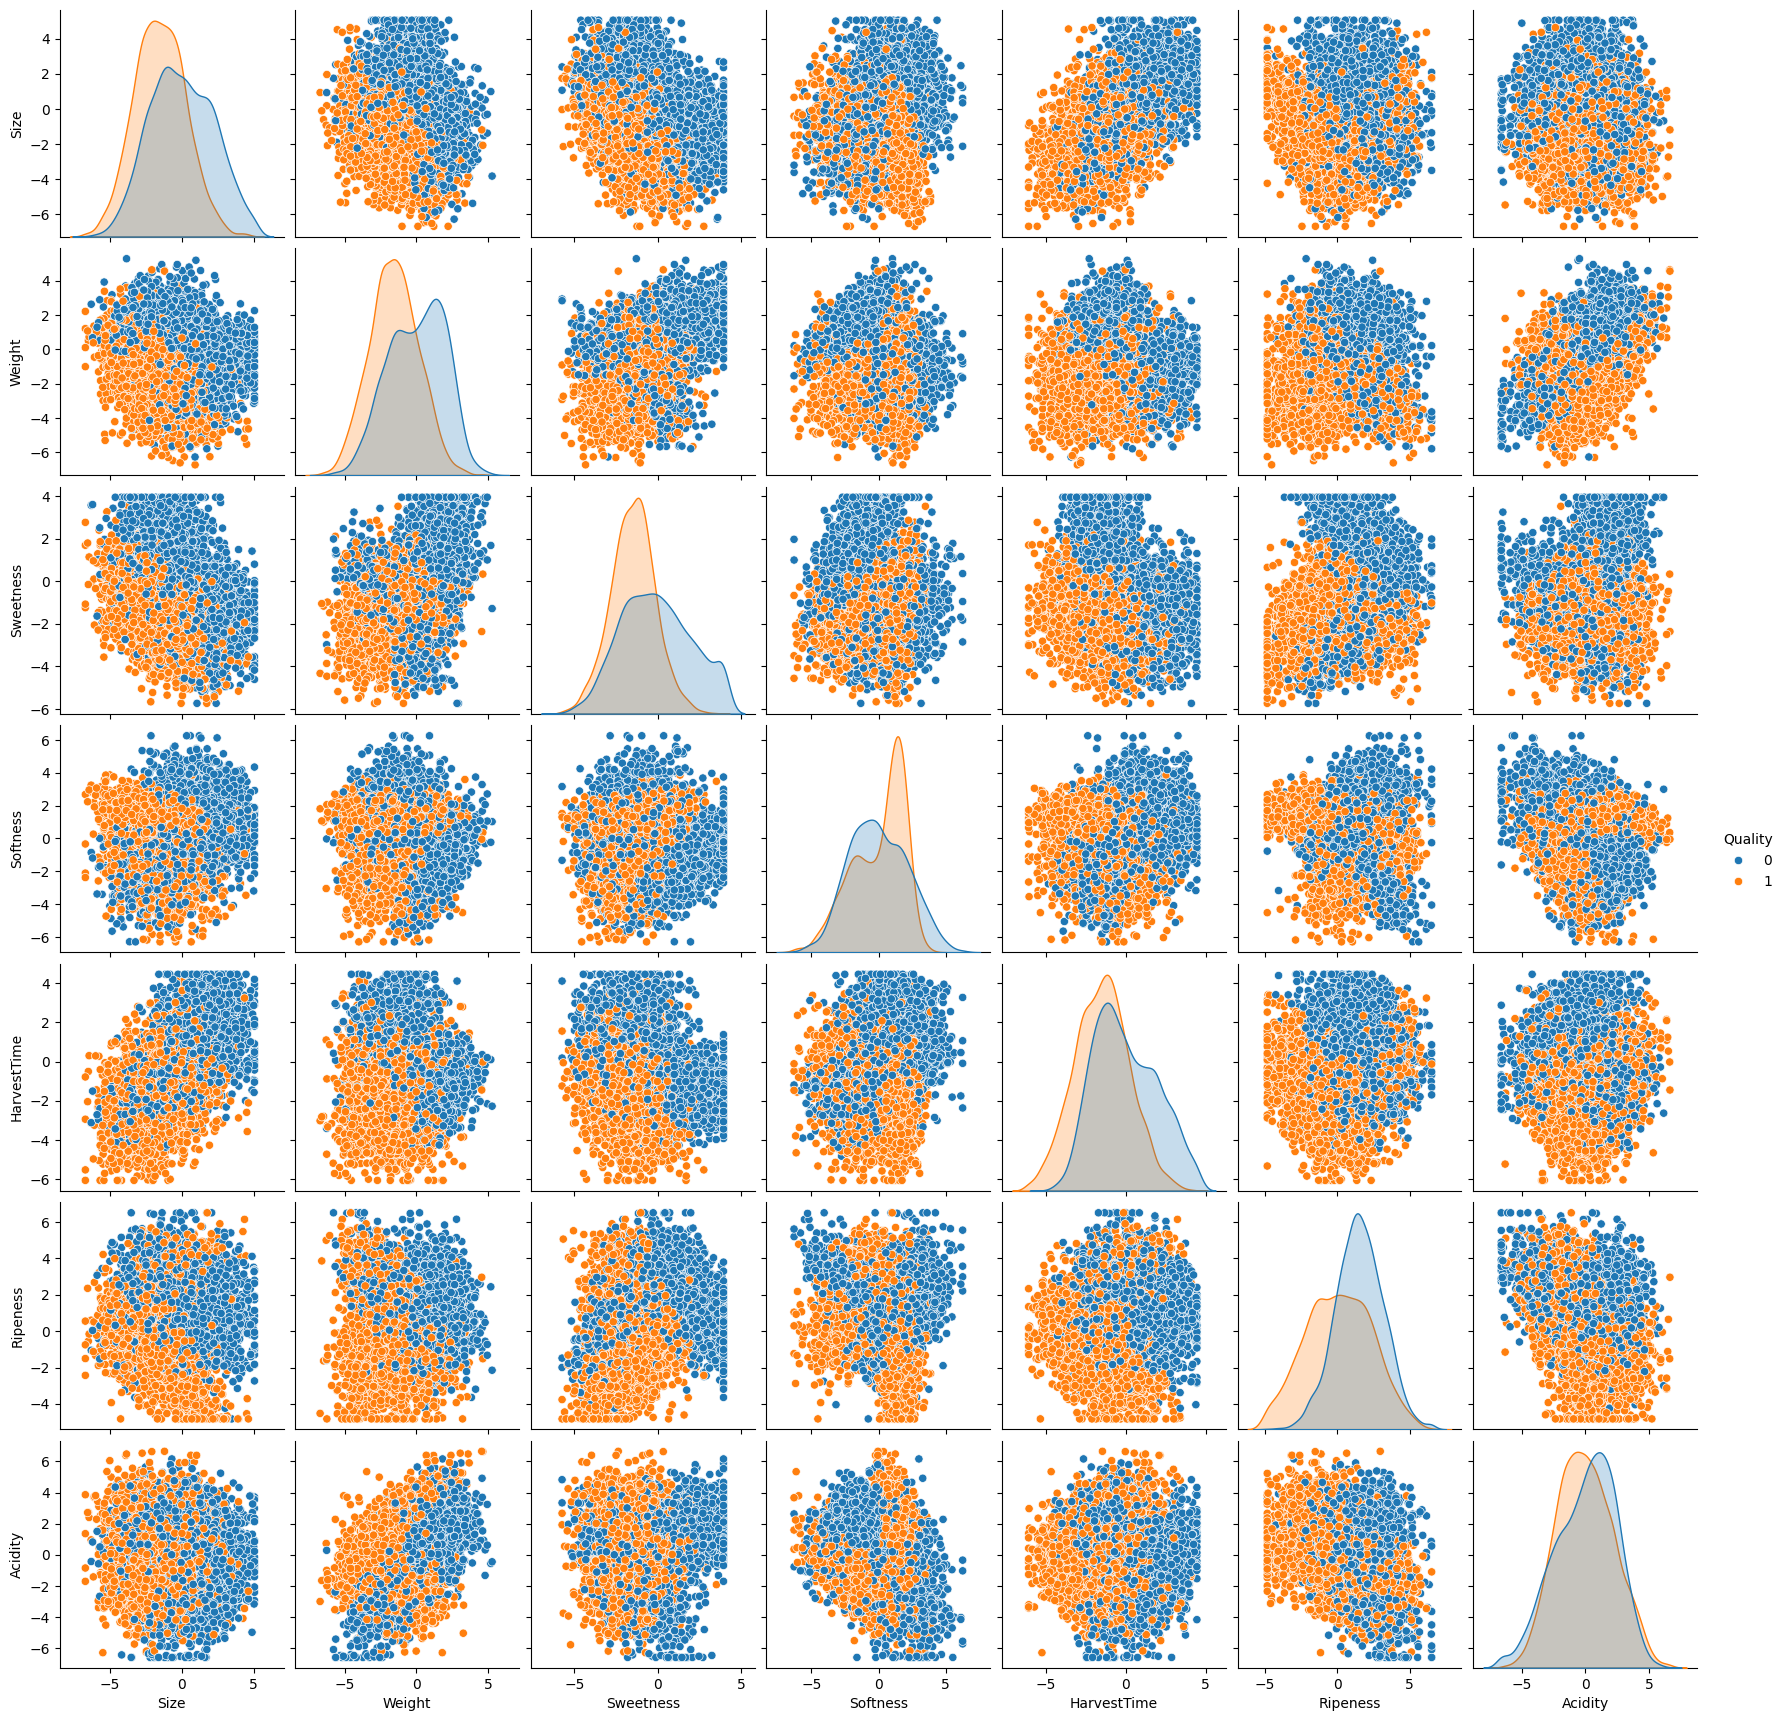

In [32]:
import seaborn as sns

# Combine the features and target variable into one DataFrame
df_combined = X_train.copy()
df_combined['Quality'] = y_train

# Plot scatter plots for every pair of features against each other
sns.pairplot(df_combined, hue='Quality', diag_kind='kde')
plt.show()


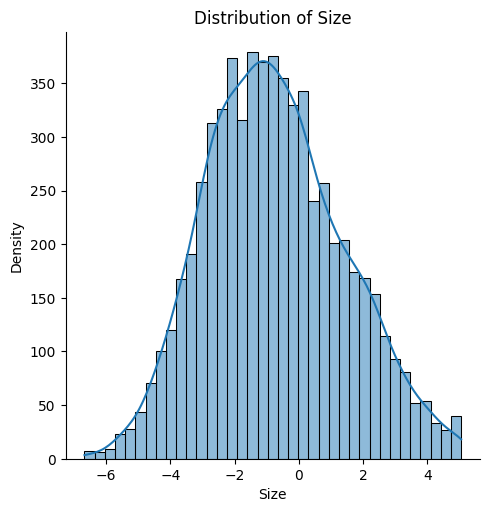

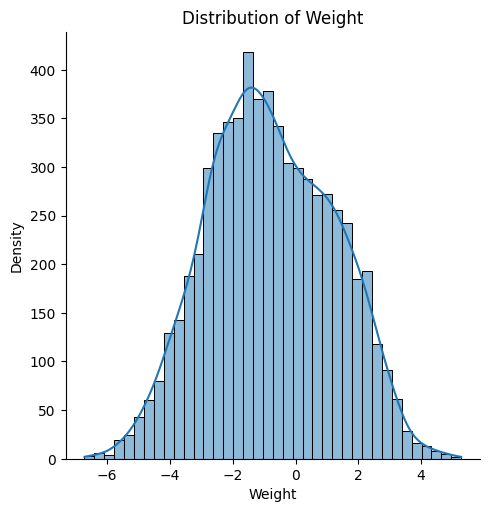

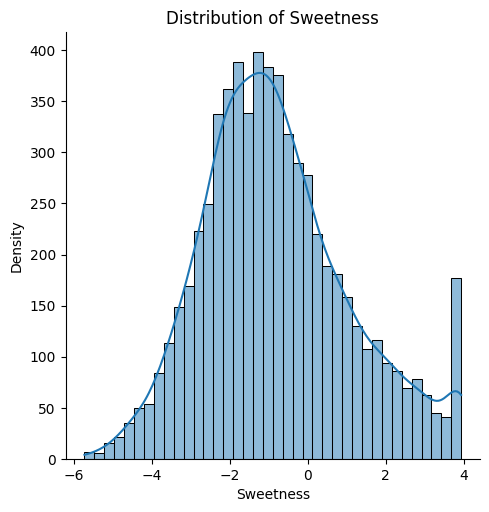

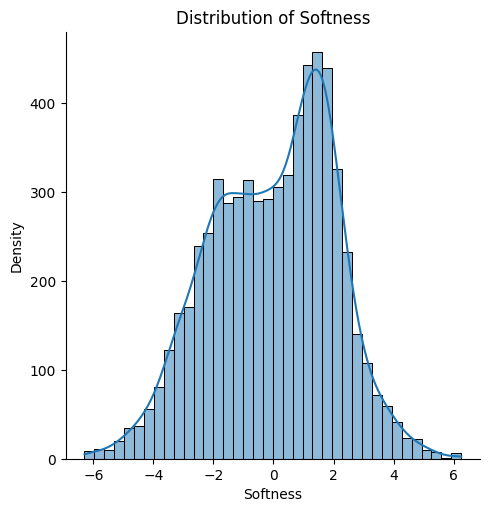

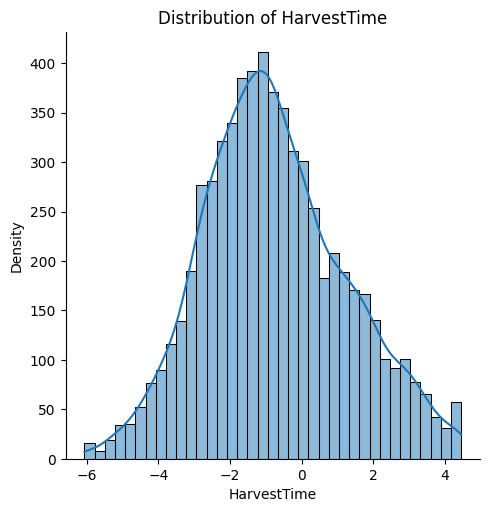

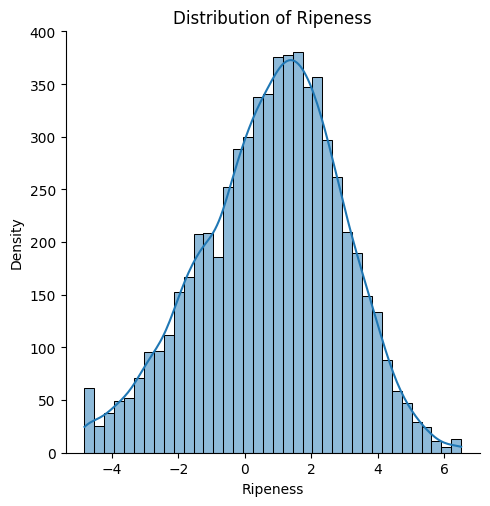

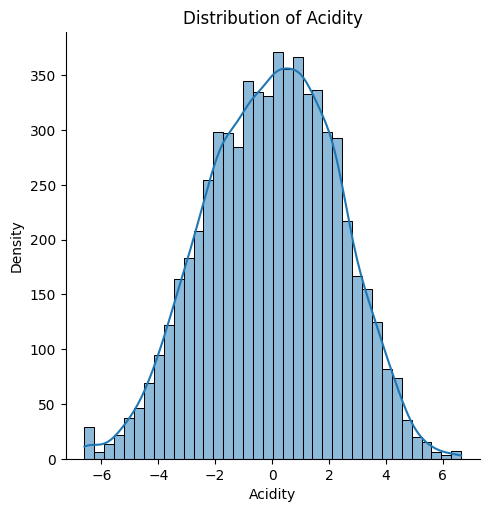

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution plots for each feature
for feature in X_train.columns:
    sns.displot(X_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


In [31]:
df_scaled = df.copy()
for column in numerical:
    df_scaled[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df_scaled

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0     0.405073  0.599374   0.911017  0.384425     0.604782  0.640332   
1     0.363736  0.600941   0.628708  0.302919     0.491862  0.607889   
2     0.538722  0.683992   0.754984  0.290963     0.515164  0.698081   
3     0.495156  0.690913   0.788183  0.400234     0.481011  0.590738   
4     0.624796  0.670323   0.590524  0.405338     0.440636  0.520684   
...        ...       ...        ...       ...          ...       ...   
7995  0.022259  0.620671   0.710171  0.737001     0.605080  0.411786   
7996  0.641792  0.375475   0.302137  0.540710     0.450842  0.221374   
7997  0.690530  0.401334   0.331062  0.578615     0.523239  0.263876   
7998  0.387428  0.331734   0.488640  0.671200     0.500384  0.109999   
7999  0.342322  0.389914   0.609285  0.621222     0.426256  0.284055   

       Acidity  Quality  
0     0.518495        0  
1     0.521215        0  
2     0.605769        0  
3     0.534090        0  
4     0.710337        0  
...        ...      ...  
7995  0.679056        1  
7996  0.657544        1  
7997  0.550661        1  
7998  0.529991        1  
7999  0.606397        1  

[8000 rows x 8 columns]

<ipython-input-10-304298f86003>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-10-304298f86003>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-10-304298f86003>:12: UserWarning: 

`distplot` is a deprecated function and will be removed

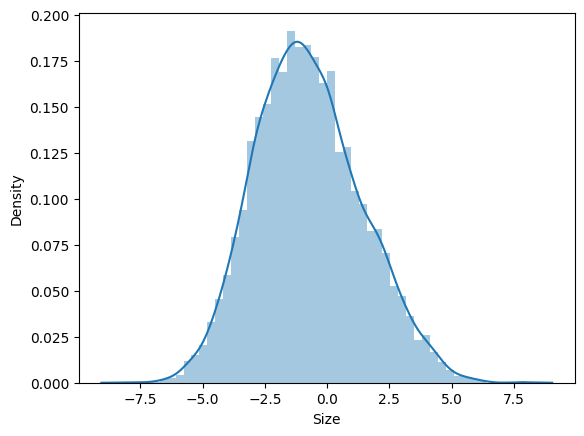

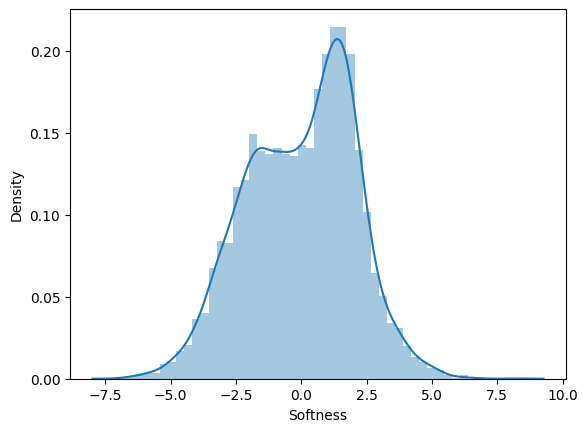

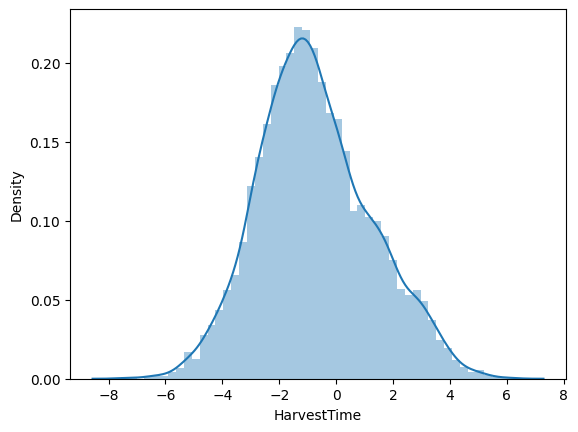

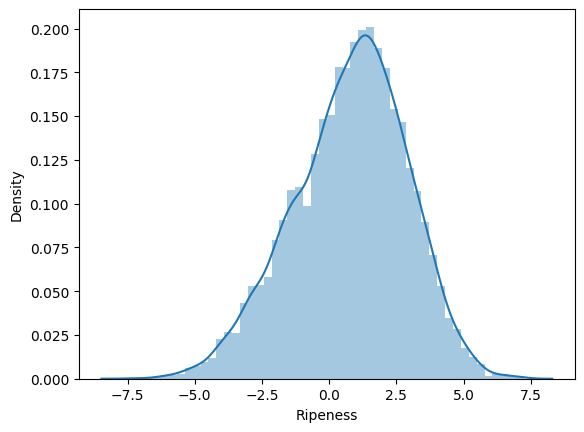

In [10]:


# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore the warnings
from warnings import filterwarnings

for feature in numerical:
  if feature!='index':
      fig = plt.figure()
      plt.xlabel("feature")
      sns.distplot(df[feature])

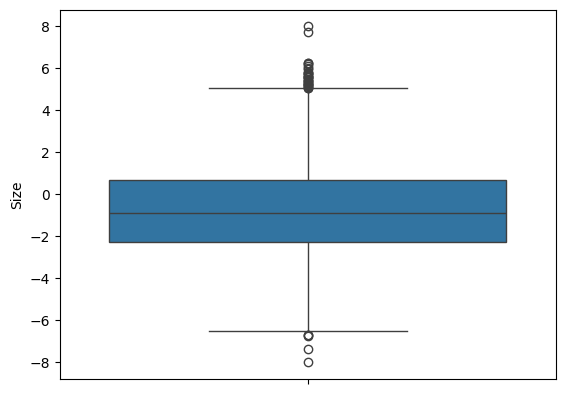

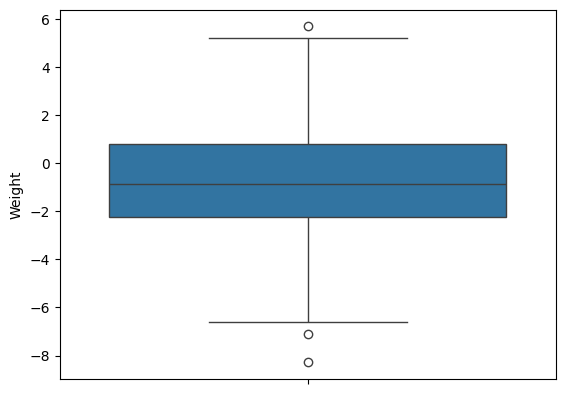

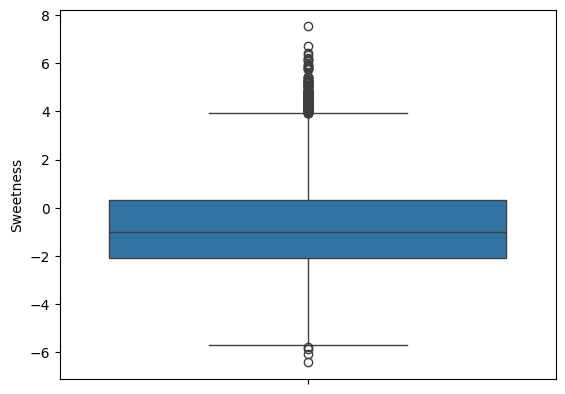

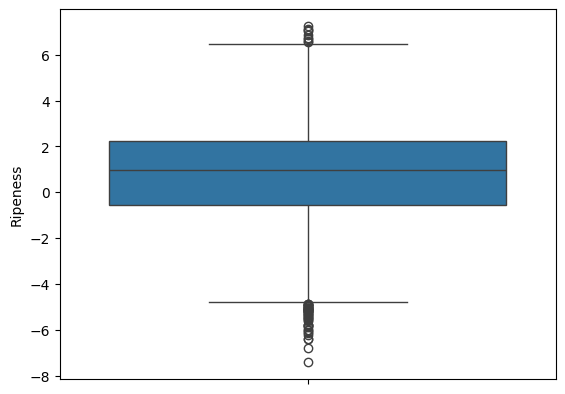

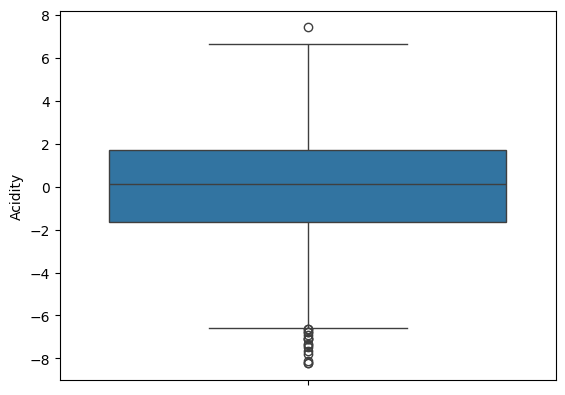

In [11]:


# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore the warnings
from warnings import filterwarnings

for feature in numerical:
  if feature!='index':
      fig = plt.figure()
      sns.boxplot(df[feature])

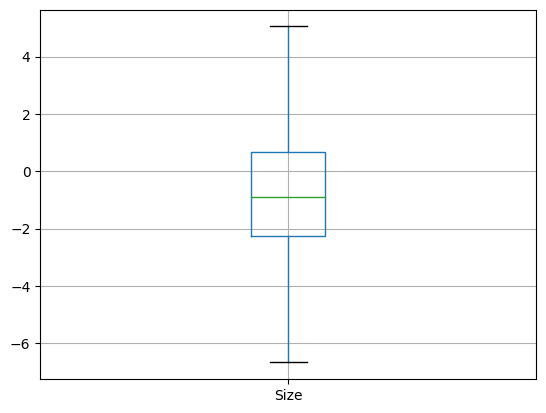

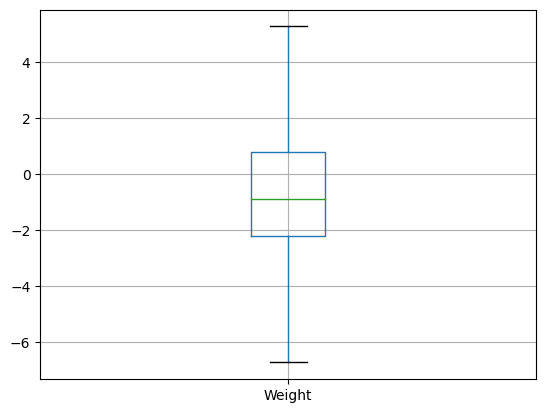

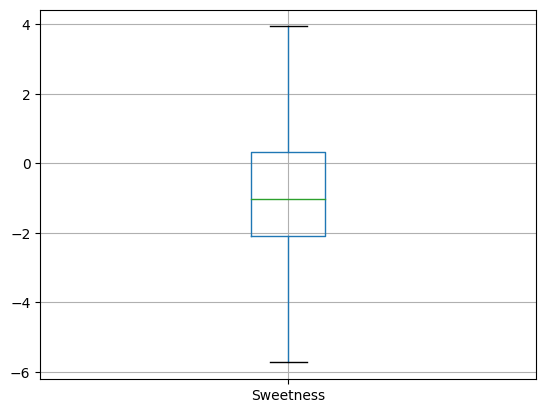

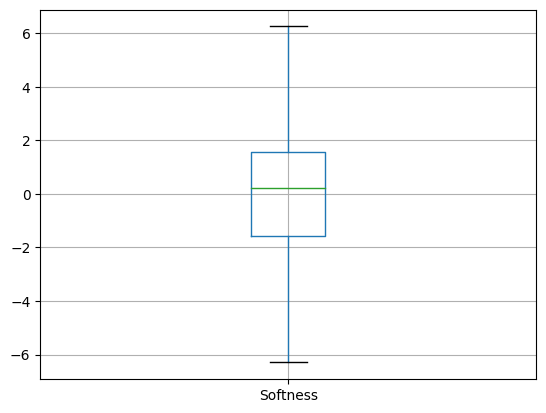

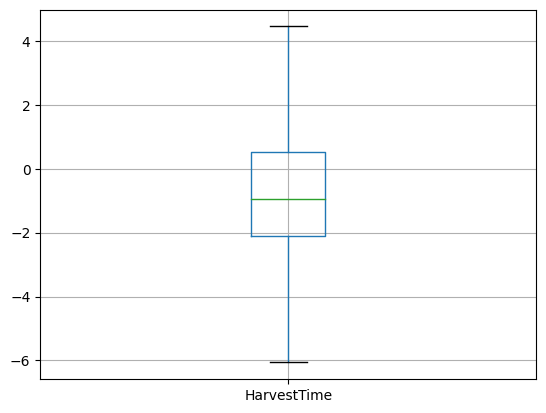

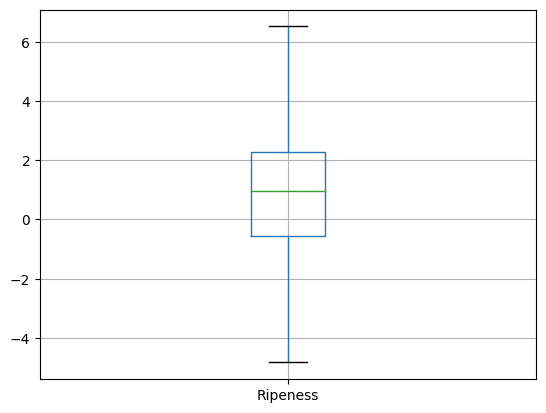

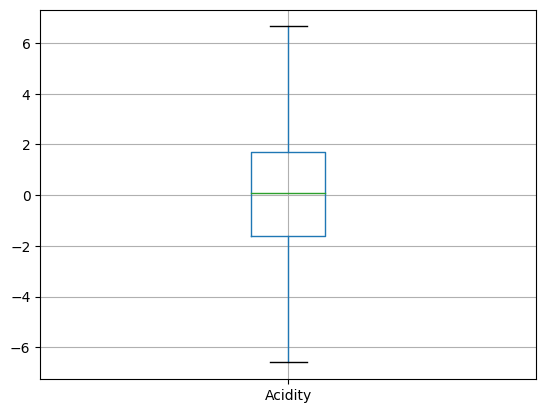

In [14]:
import matplotlib.pyplot as plt
for column in numerical:
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    df.loc[df[column] >= UB, column] = UB
    df.loc[df[column] <= LB, column] = LB
    plt.figure()
    df[[column]].boxplot()

# Model Training and Testing


In [16]:
import numpy

from sklearn.model_selection import train_test_split

X = df.drop(['Quality'] ,axis=1)
y = df['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [17]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Define models
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {}
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    {
        'name': 'Gaussian Naive Bayes',
        'model': GaussianNB(),
        'params': {}
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20]
        }
    }
]

# Perform GridSearchCV for each model
for model_info in models:
    print(f"Performing GridSearchCV for {model_info['name']}...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print("Best parameters found:", grid_search.best_params_)
    print("Best score found:", grid_search.best_score_)
    print("\n")


Performing GridSearchCV for Logistic Regression...
Best parameters found: {}
Best score found: 0.8768750000000001


Performing GridSearchCV for KNN...
Best parameters found: {'n_neighbors': 7}
Best score found: 0.9806250000000001


Performing GridSearchCV for Gaussian Naive Bayes...
Best parameters found: {}
Best score found: 0.885


Performing GridSearchCV for Decision Tree...
Best parameters found: {'max_depth': 10}
Best score found: 0.93484375




In [18]:
from sklearn.metrics import accuracy_score

# Create KNN model with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.980625


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Assuming y_Test and y_pred are your true labels and predicted labels respectively

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[808  11]
 [ 11 770]]


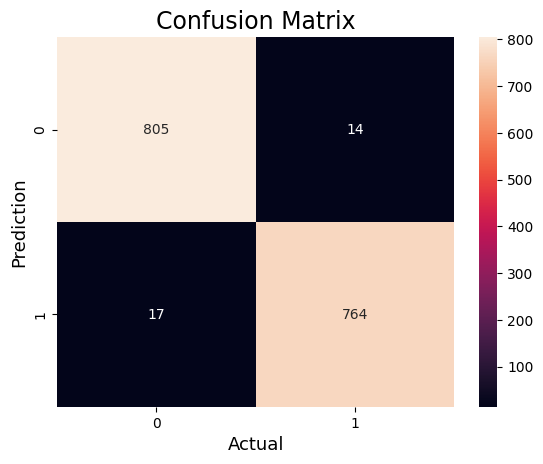

In [25]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

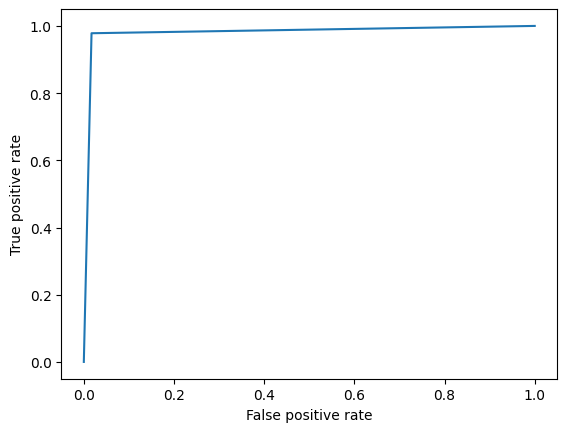

In [26]:

def plot_roc(y_Test,y_pred):
   fpr,tpr,thresholds = roc_curve(y_Test,y_pred)
   plt.plot(fpr,tpr)
   plt.xlabel("False positive rate")
   plt.ylabel("True positive rate")
   plt.show()

plot_roc(y_test,y_pred)

Epoch 1/50
200/200 [==============================] - 2s 7ms/step - loss: 0.1440 - accuracy: 0.9498 - val_loss: 0.0869 - val_accuracy: 0.9725
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0989 - accuracy: 0.9711 - val_loss: 0.0910 - val_accuracy: 0.9675
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0888 - accuracy: 0.9727 - val_loss: 0.0823 - val_accuracy: 0.9806
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9772 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 0.0827 - accuracy: 0.9758 - val_loss: 0.0728 - val_accuracy: 0.9781
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0801 - accuracy: 0.9777 - val_loss: 0.0773 - val_accuracy: 0.9781
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.0784 - val_accuracy: 0.9794
Epoch 

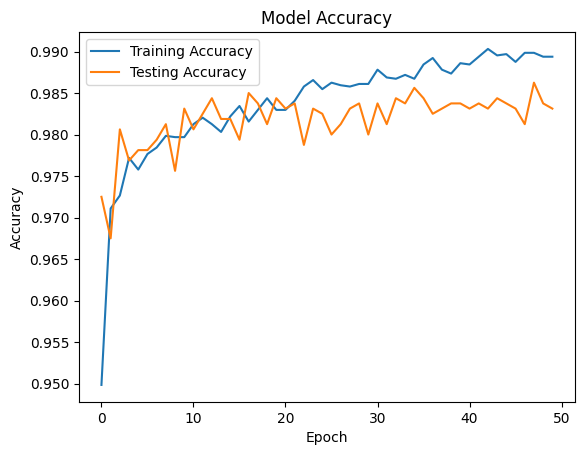

50/50 [==============================] - 0s 2ms/step


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 units and ReLU activation
    Dense(256,activation='relu'),
    Dropout(0.2),  # Dropout layer with a dropout rate of 0.2
    Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
##Save KNN Model
import pickle
with open('banana_quilty.pkl','wb') as f:
    pickle.dump(model,f)


In [ ]:
from joblib import dump
dump(model, 'banana_quilty.joblib')

['banana_quilty.joblib']

In [ ]:
model.save('banana_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('banana_model.h5')


Accuracy: 0.98625
Confusion Matrix:
[[808  11]
 [ 11 770]]


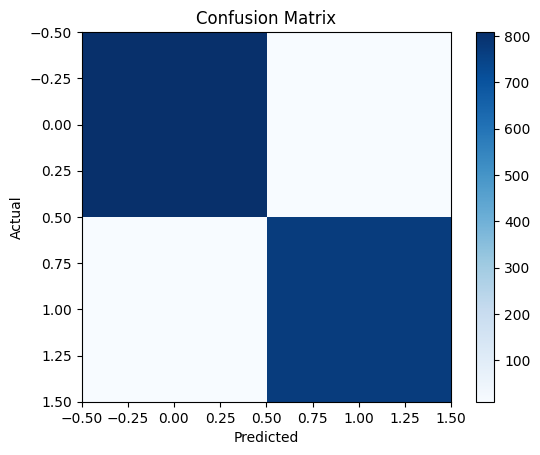

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       819
           1       0.99      0.99      0.99       781

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import joblib

# Load the dataset
data = df

# Split features and target variable
# X = data.drop('Quality', axis=1)  # Replace 'Quality' with the actual name of your target column
# y = data['Quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Save the trained model using joblib
joblib.dump(model, 'banana_quilty.joblib')

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
